In [11]:
import os
from pathlib import Path
import sys

if "__project_dir__" not in globals():
    __project_dir__ = Path.cwd().parents[1].resolve()

sys.path.append(__project_dir__)
os.chdir(__project_dir__)

In [12]:
import numpy as np
from src.model_analyser import ModelAnalyser
from src.model import tcr_metric, tcr_representation_model

In [13]:
analyser = ModelAnalyser()
model = tcr_representation_model.load_blastr_save(Path("/home/yutanagano/UCLOneDrive/MBPhD/projects/tcr_embedder/model_saves/Beta_CDR_BERT_Long_FineTuning"))
# model.distance_bins = np.linspace(0, 0.8, num=21)

In [14]:
# model = tcr_metric.BetaCdr3Levenshtein()

Running PrecisionRecallAnalysis...


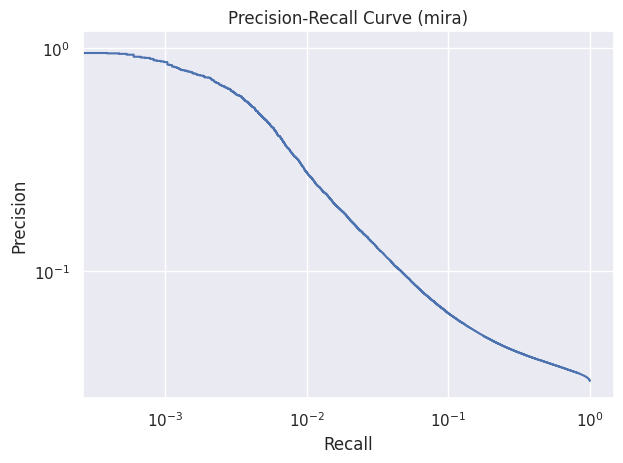

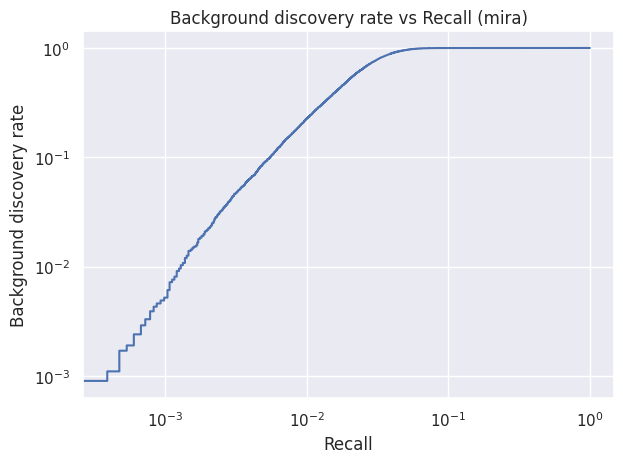

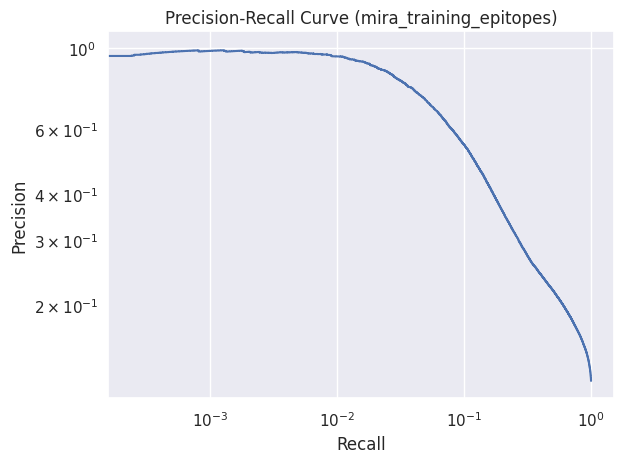

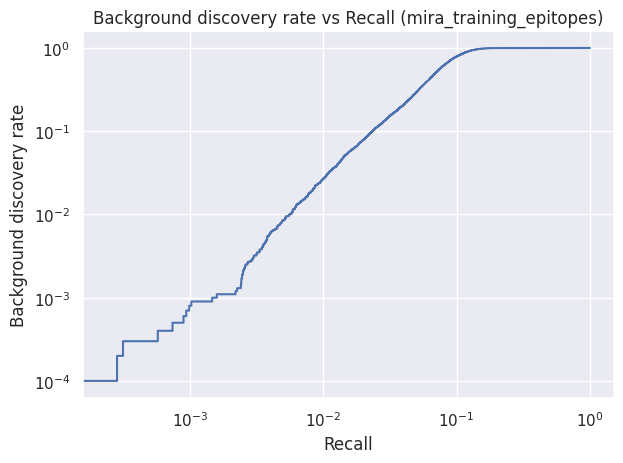

In [15]:
analyser.analyse(model)